# Cargar Dataset

In [4]:
from utils.dataset import load_dataset, create_dataset

train_images, val_images, train_labels, val_labels = load_dataset('samples/', test_size=0.2)

train_dataset = create_dataset(train_images, train_labels, batch = 4)
val_dataset = create_dataset(val_images, val_labels, batch = 4)

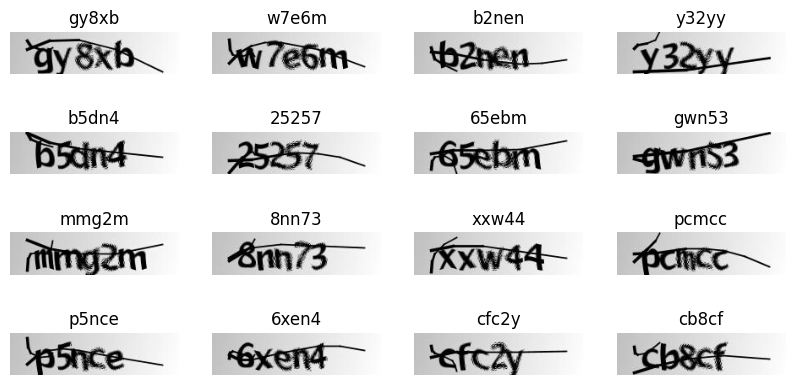

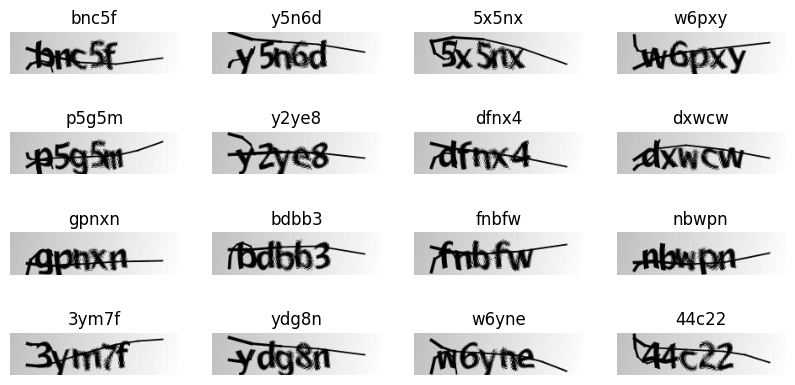

In [5]:
from utils.visualization import plot_examples

train_axes = plot_examples(train_dataset)
val_axes = plot_examples(val_dataset)

# Modelo y entrenamiento

In [4]:
from tensorflow import keras

from utils.model.build_model import build_model
from utils.visualization import plot_loss

model = build_model()

Epoch 1/100
27/27 [==============================] - 14s 254ms/step - loss: 31.7041 - val_loss: 18.0079
Epoch 2/100
27/27 [==============================] - 5s 189ms/step - loss: 17.2390 - val_loss: 16.7966
Epoch 3/100
27/27 [==============================] - 5s 193ms/step - loss: 16.6844 - val_loss: 16.5855
Epoch 4/100
27/27 [==============================] - 5s 191ms/step - loss: 16.5527 - val_loss: 16.5096
Epoch 5/100
27/27 [==============================] - 5s 192ms/step - loss: 16.4953 - val_loss: 16.4752
Epoch 6/100
27/27 [==============================] - 5s 190ms/step - loss: 16.4725 - val_loss: 16.4580
Epoch 7/100
27/27 [==============================] - 5s 201ms/step - loss: 16.4426 - val_loss: 16.4434
Epoch 8/100
27/27 [==============================] - 5s 190ms/step - loss: 16.4213 - val_loss: 16.4394
Epoch 9/100
27/27 [==============================] - 5s 189ms/step - loss: 16.4145 - val_loss: 16.4323
Epoch 10/100
27/27 [==============================] - 5s 188ms/step - lo

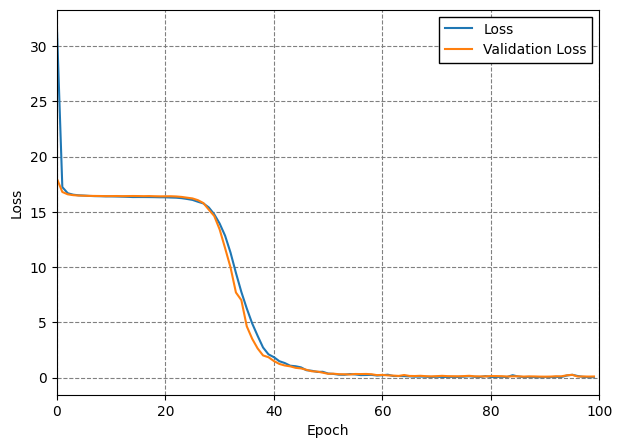

In [5]:
# Guarda el mejor modelo despues de parar el entrenamiento.
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="models/test.h5", 
    monitor="val_loss", 
    save_best_only=True)    

# Evita overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", 
    patience=15),

callbacks_list = [model_checkpoint, early_stopping]

history = model.fit(train_dataset,
                validation_data=val_dataset,
                epochs=100,
                callbacks=callbacks_list,
                verbose=1)

plot_loss(history)

# Predicciones

1/1 [==============================] - 0s 34ms/step


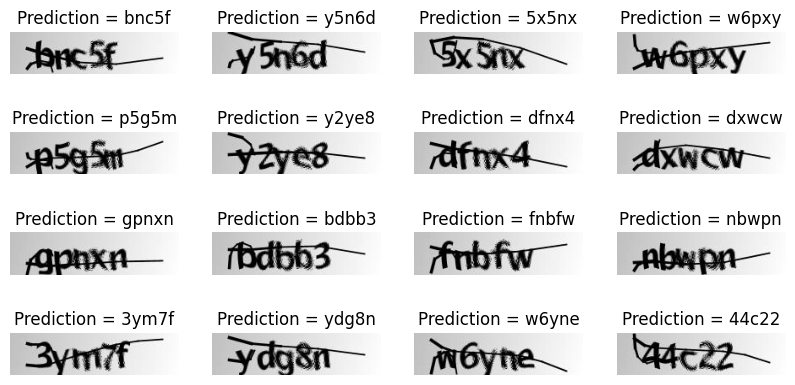

In [6]:
from utils.visualization import plot_predictions
from utils.model.inference import InferenceModel

inference_model = InferenceModel('models/test.h5')
ax = plot_predictions(val_dataset, inference_model)